In [1]:
import torch
import collections

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from FLTrack.models import ShallowNN
from FLTrack.evals import evaluate 
from FLTrack.eccentricity import euclidean_distance
from FLTrack.eccentricity import hessian_eccentricity


In [2]:
client_ids = [f"c{i}" for i in range(1, 25)]

## Loading Hessian Matrices

In [3]:
df_dict = {}
for iter in range(1,26):
    
    global_matrix_dict = {
        key: torch.load(f"hessians/saving/gn/{iter}/{key}.pth")
        for key in client_ids
    }
    
    hess_ecc = hessian_eccentricity(global_matrix_dict,euclidean_distance)
    
    df_dict[iter] = hess_ecc
    
    del global_matrix_dict
    del hess_ecc
    
#saving to avoid recalculation
data = pd.DataFrame(df_dict)
#data.to_csv("insights/ecc_over_iterations_hess.csv", index=False)

tensor(2.2684e+09, grad_fn=<AddBackward0>)
tensor(1.7249e+09, grad_fn=<AddBackward0>)
tensor(2.6729e+09, grad_fn=<AddBackward0>)
tensor(1.6171e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(2.0805e+09, grad_fn=<AddBackward0>)
tensor(2.0215e+09, grad_fn=<AddBackward0>)
tensor(3.8243e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(2.7037e+09, grad_fn=<AddBackward0>)
tensor(1.0706e+09, grad_fn=<AddBackward0>)
tensor(3.4213e+09, grad_fn=<AddBackward0>)
tensor(1.4599e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(1.0695e+09, grad_fn=<AddBackward0>)
tensor(3.5582e+09, grad_fn=<AddBackward0>)
tensor(1.0658e+09, grad_fn=<AddBackward0>)
tensor(3.7473e+09, grad_fn=<AddBackward0>)
tensor(2.8848e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(1.0657e+09, grad_fn=<AddBackward0>)
tensor(1.06

In [6]:
#loading precalculated data
#data = pd.read_csv("insights/ecc_over_iterations_hess.csv")
data['average_parameter_ecc'] = data.apply( lambda row: round(row.mean(),4), axis=1)

In [7]:
result = {}

# Iterate through the input dictionary and reformat the data
for key, sub_dict in df_dict.items():
    for sub_key, value in sub_dict.items():
        if sub_key not in result:
            result[sub_key] = [value]
        else:
            result[sub_key].append(value)

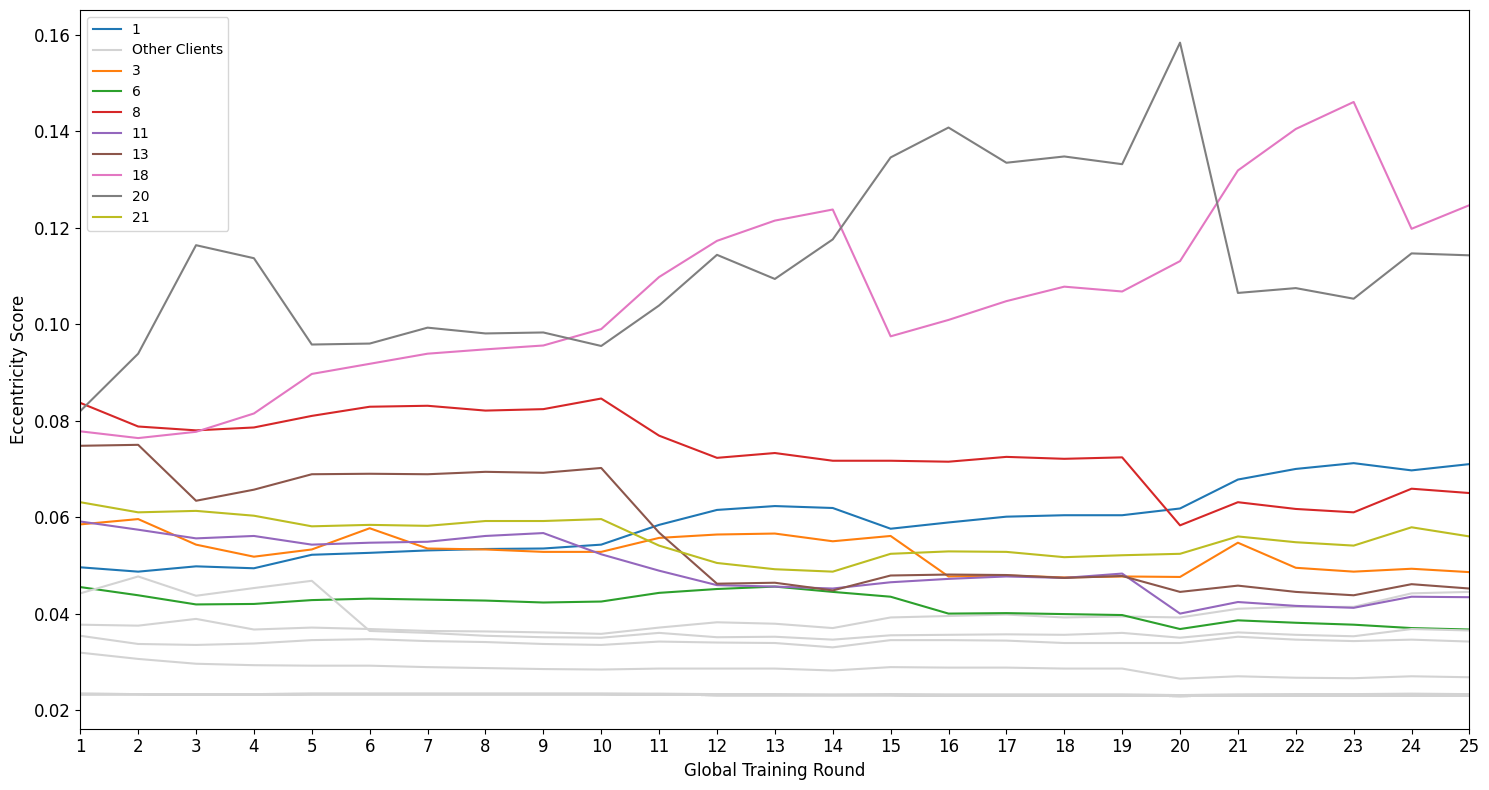

In [16]:
import matplotlib.pyplot as plt

# Define your data
data = result

x_values = list(range(1, 26))

plt.figure(figsize=(15, 8))

for i, (key, values) in enumerate(data.items()):
    if i+1 in ([1,3,6,8,11,13,18,20,21]):
        plt.plot(x_values, values, label=str(i + 1))  # Set legend label from 1 to 24
    else:
        plt.plot(x_values, values, label='Other Clients', color='lightgray')

def legend_without_duplicate_labels(plt):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    plt.legend(*zip(*unique))

plt.xlim(1,len(values))
#plt.ylim(bottom=0.035)
plt.xlabel('Global Training Round', fontsize='large')
plt.ylabel('Eccentricity Score', fontsize='large')
plt.legend(loc='upper right', ncol=4, bbox_to_anchor=(0,0,1,1), fontsize='large', framealpha=1)
legend_without_duplicate_labels(plt)
plt.xticks(x_values, fontsize='large')
plt.yticks(fontsize='large')
plt.tight_layout()
plt.show()

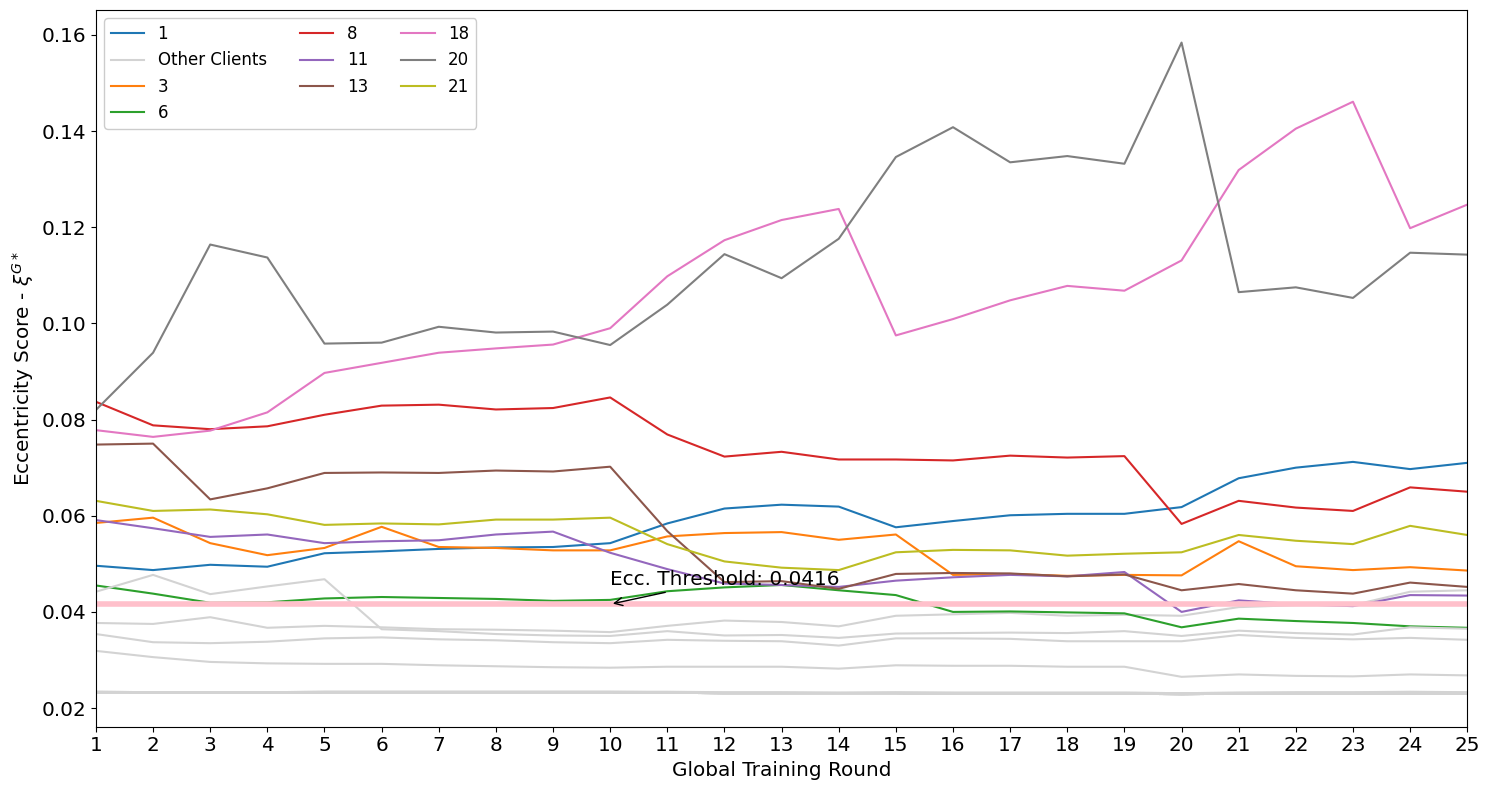

In [9]:
import matplotlib.pyplot as plt

# Define your data
data = result

x_values = list(range(1, 26))

plt.figure(figsize=(15, 8))

for i, (key, values) in enumerate(data.items()):
    if i+1 in ([1,3,6,8,11,13,18,20,21]):
        plt.plot(x_values, values, label=str(i + 1))  # Set legend label from 1 to 24
    else:
        plt.plot(x_values, values, label='Other Clients', color='lightgray')
else:
    plt.plot(x_values, [0.0416 for i in range(1, 26)], color='pink',linewidth=4)
    annotation_text = "Ecc. Threshold: 0.0416"  
    annotation_x = 10  
    annotation_y = 0.0416  
    plt.annotate(annotation_text, xy=(annotation_x, annotation_y), xytext=(annotation_x, annotation_y + 0.004),
                 arrowprops=dict(arrowstyle="->"),fontsize='x-large')

def legend_without_duplicate_labels(plt):
    handles, labels = plt.gca().get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    handles_unique, labels_unique = zip(*unique)
    plt.legend(handles_unique, labels_unique, ncol=3, bbox_to_anchor=(0,0,1,1), fontsize='large', framealpha=1)

plt.xlim(1,len(values))
#plt.ylim(bottom=0.035)
plt.xlabel('Global Training Round', fontsize='x-large')
plt.ylabel('Eccentricity Score - $\\xi^{G*}$', fontsize='x-large')
legend_without_duplicate_labels(plt)
plt.xticks(x_values, fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.tight_layout()
save_location = "plots/ecc_hg_signature_non_iid_approximate.png"
plt.savefig(save_location)
plt.show()